# Neural Networks for Multiclass Classification

Suppose that instead the dataset consisted of features that involved the output of a class with more than one possible value from a finite and discrete set of categories, i.e, there are $n_c$ classes for which $C_k$ is the $k$-th class label and $y^{(i)}\in\{C_1,C_2,\ldots,C_{n_c}\}$

One option to use for multiclass classification, also known as *multinomial logistic regression*, is a generalization of the logistic regression model for $n_c>1$ classes. This is known as the **Softmax** function.

The Softmax function is a function that converts a vector of $k$ values into a probability distribution of $k$ outcomes, i.e., given a vector $z\in\mathbb{R}^{n_c}$, the Softmax, denoted $S(z)$ has components $S(z)_j$ for $j\in[1,\ldots,n_c]$ and is defined as

$$
    S(z)_j=\frac{e^{z_j}}{\sum_{n=1}^{n_c}e^{z}_n}
$$

One thing to note about the Softmax function is that given that the denominator for all components is $\sum_{n=1}^{n_c}e^{z}_n$,
$$
\sum_{j=1}^{n_c}S(z)_j=1
$$

## Loss Function
The most common loss function used for multiclass classification using the Softmax activation function is known as the *categorical cross-entropy* function, defined as follows
$$
L(S(z),y^{(i)})=-\log(S(z)_j)\quad\text{for }y^{(i)}=C_j
$$

Since both $S(z)$ and $y^{(i)}$ are now both vectors, where for $j\in[1,\ldots,k]$, $y^{(i)}_j=1$ if the true class is $C_k$ and $y^{(i)}_j=0$ otherwise. This means that the loss can be defined as,
$$
L(S(z),y^{(i)})=-\sum_{j=1}^{n_c}y^{(i)}_j\log\left(S(z^{(i)})_j\right)
$$

### Similarity to logistic regression
Note the similarity with the binary cross entropy loss used for logistic regression, showing that Softmax is indeed a generalization to $n_c>1$ classes. Assuming a binary classification task where Softmax is used with $n_c=2$, the following below uses $S(z)_0$ and $y^{(i)}_0$ to denote the component corresponding to the negative class. If we let $S(z)_1=\hat{y}=\mathbb{P}(y^{(i)}=1\mid x)$ similar to the logistic regression definition of the probability of the positive class,

$$
\begin{align*}
L(S(z),y^{(i)})
&=-\left[y^{(i)}_1\log\left(S(z^{(i)})_1\right)+y^{(i)}_0\log\left(S(z^{(i)})_0\right)\right]\\
&=-\left[y^{(i)}_1\log\left(S(z^{(i)})_1\right)+\left(1-y^{(i)}\right)\log\left(1-S(z^{(i)})_1\right)\right]\\
&=-\left[y^{(i)}_1\log\left(\hat{y}^{(i)}\right)+\left(1-y^{(i)}\right)\log\left(1-\hat{y}^{(i)}\right)\right]\\
\end{align*}
$$

## Gradient Descent
Much of the calculations derived for gradient descent remain similar to those previously shown. In this case, it becomes important to find the gradient of the Softmax output w.r.t to its inputs. This introduces more complexity given that the output is now a vector as opposed to a scalar.

### Derivatives of the Softmax Function
To start, suppose that we want to derive $\frac{S(z)_k}{z_j}$ for any $j$, $k$. There are essentially two cases: either $j=k$ or $j\neq k$.

In the scenario where $j=k$
$$
\begin{align*}
\frac{\partial S(z)_k}{\partial z_j}
&=\frac{\partial}{\partial z_j}\left(\frac{e^{z_j}}{\sum_{n=1}^{n_c}e^{z}_n}\right)\\
&=\frac{\frac{\partial}{\partial z_j}e^{z_j}\left(\sum_{n=1}^{n_c}e^{z_n}\right)-e^{z_j}\frac{\partial}{\partial z_j}\left(\sum_{n=1}^{n_c}e^{z_n}\right)}{\left(\sum_{n=1}^{n_c}e^{z_n}\right)^2}\\
&=\frac{e^{z_j}\left(\sum_{n=1}^{n_c}e^{z_n}\right)-e^{2z_j}}{\left(\sum_{n=1}^{n_c}e^{z}_n\right)^2}\\
&=e^{z_j}\left[\frac{\left(\sum_{n=1}^{n_c}e^{z_n}\right)-e^{z_j}}{\left(\sum_{n=1}^{n_c}e^{z}_n\right)^2}\right]\\
&=e^{z_j}\left[\frac{\left(\sum_{n=1}^{n_c}e^{z_n}\right)}{\left(\sum_{n=1}^{n_c}e^{z}_n\right)^2}-\frac{e^{z_j}}{\left(\sum_{n=1}^{n_c}e^{z}_n\right)^2}\right]\\
&=e^{z_j}\left[1-\frac{e^{z_j}}{\left(\sum_{n=1}^{n_c}e^{z}_n\right)^2}\right]\\
&=S(z)_j\left(1-S(z)_j\right)
\end{align*}
$$

In the scenario where $j\neq k$
$$
\begin{align*}
\frac{\partial S(z)_k}{\partial z_j}
&=\frac{\partial}{\partial z_j}\left(\frac{e^{z_k}}{\sum_{n=1}^{n_c}e^{z}_n}\right)\\
&=e^{z_k}\cdot\frac{\partial}{\partial z_j}\left(\frac{1}{\sum_{n=1}^{n_c}e^{z}_n}\right)\\
&=-\frac{e^{z_j}e^{z_k}}{\left(\sum_{n=1}^{n_c}e^{z}_n\right)^2}\\
&=-\frac{e^{z_j}}{\left(\sum_{n=1}^{n_c}e^{z}_n\right)}\cdot\frac{e^{z_k}}{\left(\sum_{n=1}^{n_c}e^{z}_n\right)}\\
&=-S(z)_jS(z)_k
\end{align*}
$$

For a vector-valued function $S(z):\mathbb{R}^{n_c}\to\mathbb{R}^{n_c}$, these first-order partial derivatives can be represented in a Jacobian matrix $J\in\mathbb{R}^{n_c\times n_c}$ defined as follows,

$$
J
=\begin{bmatrix}
\frac{\partial S(z)_1}{\partial z_1}, & \dots & \frac{\partial S(z)_1}{\partial z_{n_c}} \\
\vdots & \ddots & \vdots \\
\frac{\partial S(z)_{n_c}}{\partial z_1}, & \dots & \frac{\partial S(z)_{n_c}}{\partial z_{n_c}} \\
\end{bmatrix}
=\begin{bmatrix}
S(z)_1\left(1-S(z)_1\right), & \dots & -S(z)_1S(z)_{n_c} \\
\vdots & \ddots & \vdots \\
-S(z)_1S(z)_{n_c}, & \dots & S(z)_{n_c}\left(1-S(z)_{n_c}\right)
\end{bmatrix}
$$

Note that the sum along its rows $k\in[1,\ldots,n_c]$ for each column $m\in[1,\ldots,n_c]$ results in,
$$
\begin{align*}
\sum_{m=1}^{n_c}J_{k, m}
&=S(z)_k\left(1-S(z)_k\right)-S(z)_kS(z)_2-\ldots-S(z)_kS(z)_{n_c}\\
&=S(z)_k\left[1-S(z)_k-S(z)_2-\ldots-S(z)_{n_c}\right]\\
&=S(z)_k\left[1-\sum_{m=1}^{n_c}S(z)_m\right]\\
&=S(z)_k\left[1-1\right]\\
&=S(z)_k\cdot 0\\
&=0
\end{align*}
$$
The same holds true for the sum along the columns of this matrix.

### Gradients of the loss w.r.t the input vector of the Softmax function
Suppose that we want to find the gradients of the *loss* w.r.t a particular input to the Softmax function $z^{[L]}_{k}$. Because $z^{[L]}_k$ for all $k\in[1,\ldots,n_c]$ is affects every component of the vector-valued function $S(z^{[L]})$ then this partial derivative is essentially a sum across the partial derivatives of the loss w.r.t the value of all other neurons dependent on $z^{[L]}_j$. Similar to before, this sum can be decomposed to two cases where $t=k$ and where $t\neq k$ for all $t\in[1,\ldots,n_c]$

$$
\begin{align*}
\frac{\partial L\left(S\left(z^{(i)}\right), y^{(i)}\right)}{\partial z^{[l]}_k}
&=\sum_{t=1}^{n_c}\left[\frac{\partial L\left(S\left(z^{(i)}\right)_t, y^{(i)}\right)}{\partial S\left(z^{(i)}\right)_t}\cdot
\frac{\partial S\left(z^{(i)}\right)_t}{z^{(i)}_k}\right]\\
&=\sum_{t=1}^{n_c}
\left[-\frac{y^{(i)}_t}{S(z^{(i)})_t}\cdot\frac{\partial S\left(z^{(i)}\right)_t}{z^{(i)}_k}\right]\\
&=
-\frac{y^{(i)}_k}{S(z^{(i)})_k}\cdot S(z^{(i)})_k\left(1-S(z^{(i)})_k\right)+\sum_{t=1\\t\neq k}^{n_c}\left[-\frac{y^{(i)}_t}{S(z^{(i)})_t}\cdot\left(-S(z^{(i)})_tS(z^{(i)})_k\right)\right]\\
&=
-y^{(i)}_k+y^{(i)}_kS(z^{(i)})_k+\sum_{t=1\\t\neq k}^{n_c}\left[y^{(i)}_t S(z^{(i)})_k\right]
\\
&=
-y^{(i)}_k+\sum_{t=1}^{n_c}\left[y^{(i)}_t S(z^{(i)})_k\right]
\quad\scriptsize{\text{include 2nd term back in the summation because it is not different}}\\
&=
-y^{(i)}_k+S(z^{(i)})_k\sum_{t=1}^{n_c}y^{(i)}_t
\\
&=
-y^{(i)}_k+S(z^{(i)})_k
\quad\quad\scriptsize{\sum_{t=1}^{n_c}y^{(i)}_t=1\text{ because of one-hot encoding}}\\
&=\left(S(z^{(i)})-y^{(i)}\right)_k
\end{align*}
$$

## Implementation
This demonstration makes use of the UCI ML handwritten digits datasets available in `scikit-learn`.

In [1]:
from sklearn.datasets import load_digits
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

np.random.seed(0)

In [2]:
digits_X, digits_Y = load_digits(return_X_y = True)
digits_Y = digits_Y[:, np.newaxis]
digits_X.shape, digits_Y.shape

((1797, 64), (1797, 1))

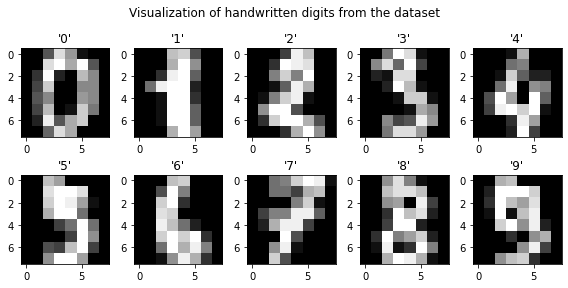

In [3]:
# Visualizing the dataset
fig, axs = plt.subplots(2, 5)
fig.set_size_inches((8, 4))
for i in range(10):
    row = i // 5
    col = i % 5
    axs[row, col].set_title("'{}'".format(digits_Y[i, 0]))
    axs[row, col].imshow(digits_X[i, :].reshape(8, 8), cmap = 'gray')

fig.suptitle('Visualization of handwritten digits from the dataset')
plt.tight_layout()
plt.show()

In [4]:
def one_hot_encode(labels):
    one_hot = np.zeros((labels.shape[0], labels.max() + 1))
    one_hot[np.arange(0, labels.shape[0]), labels.max(axis = 1)] = 1
    return one_hot

X = digits_X.T
Y = one_hot_encode(digits_Y).T

X.shape, Y.shape

((64, 1797), (10, 1797))

In [5]:
class NeuralNetwork:
    def __init__(self, layer_sizes, activations, loss_function):
        self.weights = [ np.random.randn(layer_sizes[idx], n) * (1.0 / np.sqrt(2.0 * layer_sizes[idx]))
                         for idx, n in enumerate(layer_sizes[1:]) ]
        self.biases  = [ np.zeros((n, 1)) for n in layer_sizes[1:] ]
        self.layer_activations = activations
        
        self.activation = {
            'sigmoid' : lambda z : 1 / (1 + np.exp(-z)),
            'relu'    : lambda z : np.maximum(0, z),
            'softmax' : lambda z : np.exp(z) / np.sum(np.exp(z), axis = 0),
            'identity': lambda z : z
        }
        self.activation_prime = {
            'sigmoid' : lambda a_out, z_out : a_out * (1 - a_out),
            'relu'    : lambda a_out, z_out : a_out > 0.0,
            'identity': lambda a_out, z_out : np.ones(a_out.shape),
            'softmax' : lambda a_out, z_out : a_out # handled using special case with the Jacobian matrix
        }
        self.losses_func = {
            'binary_crossentropy'     : lambda y_pred, y_true: -(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred)),
            'categorical_crossentropy': lambda y_pred, y_true: -np.log(np.sum(y_pred * y_true, axis = 0))
        }
        
        self.losses_prime = {
            'binary_crossentropy'     : lambda y_pred, y_true: (y_pred - y_true) / (y_pred * (1 - y_pred)),
            'categorical_crossentropy': lambda y_pred, y_true: -y_true / y_pred
        }
        self.metrics_func = {
            'binary_class_accuracy': lambda y_pred, y_true: np.mean(np.round(y_pred) == y_true),
            'multiclass_accuracy'  : lambda y_pred, y_true: np.mean(np.argmax(y_pred, axis = 0) == np.argmax(y_true, axis = 0))
        }
        
        self.loss_func  = self.losses_func[loss_function]
        self.loss_prime = self.losses_prime[loss_function] 
        
    def train(self, train_X, train_Y, num_epochs, learning_rate, metrics = None):
        len_ds = train_X.shape[1]
        
        loss_hist    = [ 0 for x in range(num_epochs) ]
        metrics_hist = { m : [] for m in metrics } 
        
        for epoch in range(num_epochs):
            z_outs = [ train_X ]
            a_outs = [ train_X ]
        
            # Forward pass
            for idx, (weights, biases) in enumerate(zip(self.weights, self.biases)):
                g_func = self.activation[self.layer_activations[idx]]
                Z_prev = a_outs[idx]
                Z_next = np.dot(weights.T, Z_prev) + biases
                
                if self.layer_activations[idx] == 'softmax':
                    Z_next = Z_next - Z_next.max(axis = 0)
                
                A_next = g_func(Z_next)
                
                z_outs.append(Z_next)
                a_outs.append(A_next)
                
            # Compute loss
            loss = np.mean(self.loss_func(a_outs[-1], train_Y))
            loss_hist[epoch] = loss
            
            for metric in metrics:
                metrics_hist[metric].append(self.metrics_func[metric](a_outs[-1], train_Y))
            
            # Backward pass
            dLoss_dAs = [ self.loss_prime(a_outs[-1], train_Y) ]
            
            dLoss_dws = []
            dLoss_dbs = []
            
            for idx in reversed(range(len(self.weights))):
                a_curr = a_outs[idx + 1]
                z_curr = z_outs[idx + 1]
                a_prev = a_outs[idx]
                
                dLoss_dA_curr = dLoss_dAs[len(self.weights) - 1 - idx]
                
                if self.layer_activations[idx] == 'softmax':
                    diags       = np.einsum('kx,kw->xwk', a_curr, np.identity(a_curr.shape[0]))
                    dSoftmax_dZ = np.einsum('zx,xk->xkz', -a_curr, a_curr.T) + diags
                    dLoss_dZ    = np.einsum('xhw,wx->hx', dSoftmax_dZ, dLoss_dA_curr)
                else:
                    g_prime  = self.activation_prime[self.layer_activations[idx]]
                    dLoss_dZ = dLoss_dA_curr * g_prime(a_curr, z_curr)
                
                dLoss_dw = np.dot(a_prev, dLoss_dZ.T) / len_ds
                dLoss_db = np.mean(dLoss_dZ, axis = 1, keepdims = True)
                
                dLoss_dws.insert(0, dLoss_dw)
                dLoss_dbs.insert(0, dLoss_db)
                
                dLoss_dAprev = np.dot(self.weights[idx], dLoss_dZ)
                dLoss_dAs.append(dLoss_dAprev)
            
            # Update step
            for idx in range(len(self.weights)):
                self.weights[idx] = self.weights[idx] - (dLoss_dws[idx] * learning_rate)
                self.biases[idx]  = self.biases[idx]  - (dLoss_dbs[idx] * learning_rate)
            
        return loss_hist, metrics_hist
    
    def predict(self, test_X):
        z_outs = test_X
        a_outs = test_X
        
        for idx, (weights, biases) in enumerate(zip(self.weights, self.biases)):
            g_func = self.activation[self.layer_activations[idx]]
            
            Z_prev = a_outs
            Z_next = np.dot(weights.T, Z_prev) + biases
            
            if self.layer_activations[idx] == 'softmax':
                Z_next = Z_next - Z_next.max(axis = 0)
            
            A_next = g_func(Z_next)

            z_outs = Z_next
            a_outs = A_next
                
        return a_outs

nn = NeuralNetwork([64, 128, 128, 10], ['relu', 'relu', 'softmax'], 'categorical_crossentropy')
loss_hist, metrics_hist = nn.train(X, Y, num_epochs = 200, learning_rate = 0.025, metrics = ['multiclass_accuracy'])

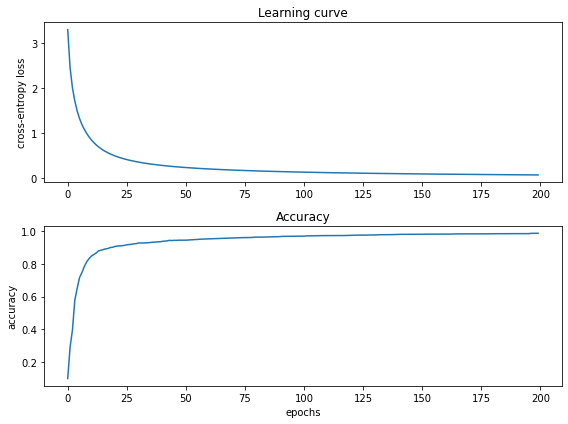

In [6]:
fig, ax = plt.subplots(2, 1)
fig.set_size_inches((8, 6))
ax[0].plot(loss_hist)
ax[0].set_title('Learning curve')
ax[0].set_ylabel('cross-entropy loss')
ax[1].set_title('Accuracy')
ax[1].plot(metrics_hist['multiclass_accuracy'])
ax[1].set_ylabel('accuracy')
plt.xlabel('epochs')
plt.tight_layout()
plt.show()

### Classification Metrics

In [7]:
y_pred = pd.Series(np.argmax(nn.predict(X), axis = 0), name = 'predicted')
y_true = pd.Series(np.argmax(Y, axis = 0), name = 'actual')

pd.crosstab(y_pred, y_true)

actual,0,1,2,3,4,5,6,7,8,9
predicted,,,,,,,,,,
0,177,0,0,0,0,0,0,0,0,0
1,0,182,0,0,1,0,1,0,4,0
2,0,0,177,0,0,0,0,0,0,0
3,0,0,0,179,0,0,0,0,0,0
4,1,0,0,0,178,0,0,0,0,0
5,0,0,0,2,0,180,1,0,1,1
6,0,0,0,0,0,1,179,0,1,0
7,0,0,0,1,0,0,0,177,1,0
8,0,0,0,1,1,0,0,1,167,1


In [8]:
from sklearn.metrics import classification_report, cohen_kappa_score, roc_auc_score

print(classification_report(y_pred, y_true))
print()
print("Cohen's Kappa: {:.4f}".format(cohen_kappa_score(y_pred, y_true)))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00       177
           1       1.00      0.97      0.98       188
           2       1.00      1.00      1.00       177
           3       0.98      1.00      0.99       179
           4       0.98      0.99      0.99       179
           5       0.99      0.97      0.98       185
           6       0.99      0.99      0.99       181
           7       0.99      0.99      0.99       179
           8       0.96      0.98      0.97       171
           9       0.99      0.98      0.99       181

    accuracy                           0.99      1797
   macro avg       0.99      0.99      0.99      1797
weighted avg       0.99      0.99      0.99      1797


Cohen's Kappa: 0.9858
